In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sys 
sys.path.append('../')
from classes.fbref import FBRef

## Compare BIG SIX in Premier League metrics:
Arsenal, Chelsea, Liverpool, Manchester City, Manchester United and Tottenham players.

In [3]:
data = FBRef()

In [4]:
premier = data.get_hdf5('premier_j2.h5', 'Jornada 2')

## Scrap teams:

In [5]:
### BIG SIX
arsenal = premier['Jornada 2']['Arsenal']['Away']['Away']
chelsea = premier['Jornada 2']['Chelsea']['Away']['Away']
liverpool = premier['Jornada 2']['Liverpool']['Home']['Home']
man_c = premier['Jornada 2']['Manchester City']['Home']['Home']
man_u = premier['Jornada 2']['Manchester United']['Away']['Away']
tottenham = premier['Jornada 2']['Tottenham']['Home']['Home']

### Basic Stuff: 
### TEAMS AND COLORS
team_names = ['Arsenal', 'Chelsea', 'Liverpool', 'ManC', 'ManU', 'Tottenham']
color_codes = ['red', 'blue', '#8f1402', '#014d4e', 'magenta', '#00035b']

#### Positions and columns:

In [6]:
### Passes
rows_passes = [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 3_level_0', 'Pos'), ('Unnamed: 5_level_0', 'Min'), ('Total', 'Cmp'), ('Total', 'Att'), ('Total', 'Cmp%'), ('Unnamed: 22_level_0', 'xA'), ('Unnamed: 27_level_0', 'PrgP'), ('Player ID', '')]

#### List of positions
cm_list = ['CM', 'LM', 'RM', 'DM', 'AM']

In [7]:
### Teams
arsenal_passes = data.structure_passing(rows_passes, cm_list, arsenal)
chelsea_passes = data.structure_passing(rows_passes, cm_list, chelsea)
liverpool_passes = data.structure_passing(rows_passes, cm_list, liverpool)
manc_passes = data.structure_passing(rows_passes, cm_list, man_c)
manu_passes = data.structure_passing(rows_passes, cm_list, man_u)
tottenham_passes = data.structure_passing(rows_passes, cm_list, tottenham)

In [8]:
### Data of Passes:
data_passes = [arsenal_passes, chelsea_passes, liverpool_passes, manc_passes, manu_passes, tottenham_passes]

## Recolect it in one Panda Dataset:
premier_passes = data.league_panda(data_passes, team_names, color_codes)

## Plot the stats:

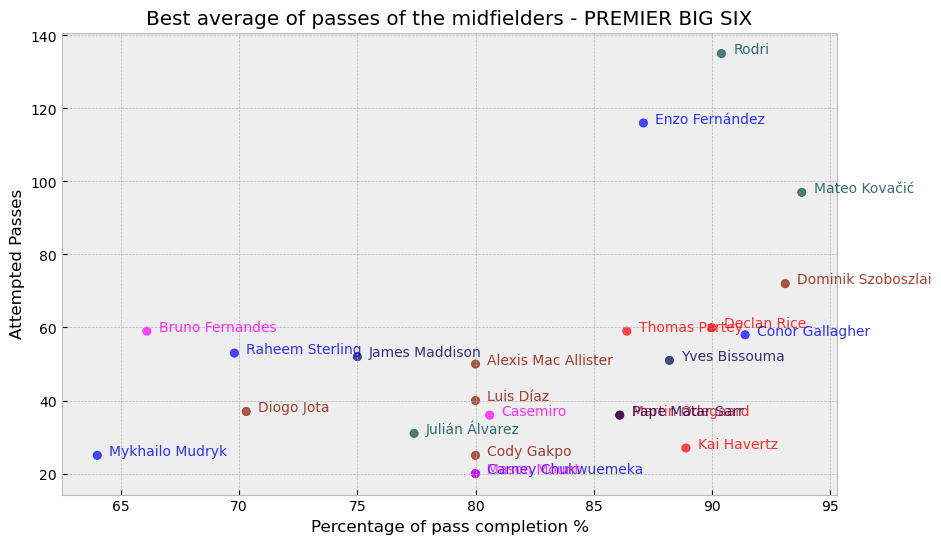

In [9]:
## Style plot
plt.style.use('bmh')

# PLOT 
plt.figure(figsize=(10, 6))

data.scatter_match(premier_passes[('Total', 'Cmp%')].values, premier_passes[('Total', 'Att')].values, premier_passes[('Unnamed: 0_level_0', 'Player')].values, premier_passes['ColorCode'].values, distance=0.5)

#### COMPETITION
league = 'PREMIER BIG SIX'

#### STYLES:
plt.title(f'Best average of passes of the midfielders - {league}')
plt.ylabel('Attempted Passes')
plt.xlabel('Percentage of pass completion %')
plt.grid(True)

## Plot the xG/xA

In [10]:
## disable error
pd.options.mode.chained_assignment = None
### Rows danger
rows_shots = ['Player', 'xG', 'Pos', 'Min', 'Player ID']
### Attack positions:
attack_list = ['CM', 'LM', 'RM', 'DM', 'AM', 'FW', 'LW', 'RW']

In [11]:
### BIG SIX
arsenal_att = data.attack_structure(rows_shots, attack_list, arsenal)
chelsea_att = data.attack_structure(rows_shots, attack_list, chelsea)
liverpool_att = data.attack_structure(rows_shots, attack_list, liverpool)
manc_att = data.attack_structure(rows_shots, attack_list, man_c)
manu_att = data.attack_structure(rows_shots, attack_list, man_u)
tottenham_att = data.attack_structure(rows_shots, attack_list, tottenham)

In [12]:
## Data:
data_att = [arsenal_att, chelsea_att, liverpool_att, manc_att, manu_att, tottenham_att]

## Recap of the Data 

In [13]:
premier_xGxA = data.league_panda(data_att, team_names, color_codes)

premier_xGxA

,Player,xG,Pos,Min,Player ID,xA,team,ColorCode
0,Bukayo Saka,0.2,"RW,LB",88,bc7dc64d,0.1,Arsenal,red
1,Martin Ødegaard,0.8,"RM,CM",88,79300479,0.1,Arsenal,red
2,Thomas Partey,0.1,"RB,CM",90,529f49ab,0.1,Arsenal,red
3,Nicolas Jackson,0.8,FW,90,9c36ed83,0.1,Chelsea,blue
4,Mykhailo Mudryk,0.1,"WB,AM",45,049a888d,0.2,Chelsea,blue
5,Raheem Sterling,0.1,"AM,FW",90,b400bde0,0.2,Chelsea,blue
6,Enzo Fernández,0.8,CM,90,5ff4ab71,0.4,Chelsea,blue
7,Diogo Jota,0.7,"FW,RM",75,178ae8f8,0.1,Liverpool,#8f1402
8,Luis Díaz,0.4,"LW,LM",85,4a1a9578,0.2,Liverpool,#8f1402
9,Mohamed Salah,1.2,"RW,FW",85,e342ad68,0.1,Liverpool,#8f1402


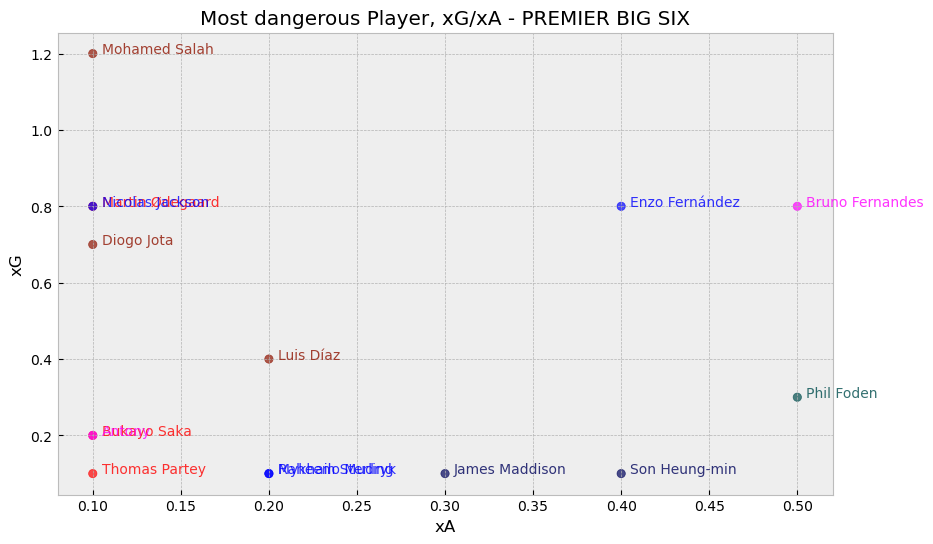

In [14]:
## Style plot
plt.style.use('bmh')

#PLOT
plt.figure(figsize=(10, 6))

data.scatter_match(premier_xGxA['xA'].values, premier_xGxA['xG'].values, premier_xGxA['Player'].values, premier_xGxA['ColorCode'].values, distance=0.005)

#### COMPETITION
league = 'PREMIER BIG SIX'

#### STYLES:
plt.title(f'Most dangerous Player, xG/xA - {league}')
plt.xlabel('xA')
plt.ylabel('xG')
plt.grid(True)